# MNIST

In [1]:
import keras
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# load mnist dataset
(X_train, y_train), (X_test, y_test_classes) = mnist.load_data()

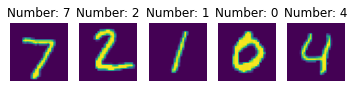

In [2]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.title(f'Number: {y_test_classes[i]}')
    plt.imshow(X_test[i])
    plt.axis('off')

In [3]:
print(f"train data amount: {X_train.shape[0]}, each image has shape {X_train.shape[1]}x{X_train.shape[2]}")
print(f"test data amount: {X_test.shape[0]}, each image has shape {X_test.shape[1]}x{X_test.shape[2]}")

train data amount: 60000, each image has shape 28x28
test data amount: 10000, each image has shape 28x28


In [4]:
# reshape to (channels, conv_dim1, conv_dim2, conv_dim3)

img_rows = 28
img_cols = 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) / 255.0
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) / 255.0
input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [5]:
classes_amount = 10

# convert class number to vector 
# i.e. 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

y_train = keras.utils.to_categorical(y_train, classes_amount)
y_test = keras.utils.to_categorical(y_test_classes, classes_amount)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# The architecture followed here is 2 convolution layers followed by pooling layer, 
# a fully connected layer and softmax layer respectively

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

# output a softmax to squash the matrix into output probabilities
model.add(Dense(classes_amount, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D

# LeNet-5

model2 = Sequential()

model2.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model2.add(AveragePooling2D())

model2.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model2.add(AveragePooling2D())

model2.add(Flatten())

model2.add(Dense(units=120, activation='relu'))

model2.add(Dense(units=84, activation='relu'))

model2.add(Dense(units=10, activation = 'softmax'))
           
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [8]:
batch_size = 64
epoch_amount = 10

# train the model using built-in learning and evaluation loops
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epoch_amount,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
938/938 [==============================] - 57s 60ms/step - loss: 0.4064 - accuracy: 0.8739 - val_loss: 0.0456 - val_accuracy: 0.9855
Epoch 2/10
938/938 [==============================] - 56s 60ms/step - loss: 0.0820 - accuracy: 0.9748 - val_loss: 0.0387 - val_accuracy: 0.9868
Epoch 3/10
938/938 [==============================] - 56s 60ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0305 - val_accuracy: 0.9905
Epoch 4/10
938/938 [==============================] - 55s 59ms/step - loss: 0.0511 - accuracy: 0.9842 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 5/10
938/938 [==============================] - 56s 60ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0290 - val_accuracy: 0.9906
Epoch 6/10
938/938 [==============================] - 56s 60ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 7/10
938/938 [==============================] - 55s 59ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0316 - val_accuracy:

In [9]:
batch_size = 64
epoch_amount = 10

# train the model using built-in learning and evaluation loops
model2_log = model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epoch_amount,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.6335 - accuracy: 0.8073 - val_loss: 0.0913 - val_accuracy: 0.9724
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0981 - accuracy: 0.9702 - val_loss: 0.0556 - val_accuracy: 0.9825
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0635 - accuracy: 0.9807 - val_loss: 0.0398 - val_accuracy: 0.9865
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0475 - val_accuracy: 0.9850
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0481 - val_accuracy: 0.9846
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0298 - val_accuracy: 0.9901
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0308 - val_accuracy: 0.9896
Epoch 

In [10]:
import matplotlib.pyplot as plt

def draw_plot(plot_data, title, xlabel, ylabel):
    plt.plot(plot_data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

### First model

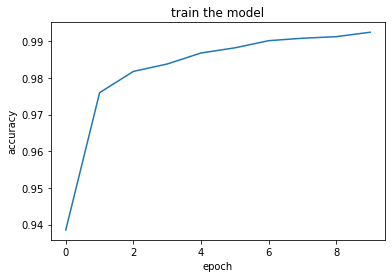

In [11]:
draw_plot(model_log.history['accuracy'], 'train the model', 'epoch', 'accuracy')

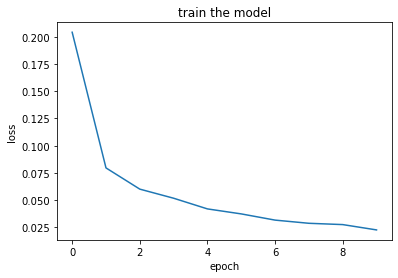

In [12]:
draw_plot(model_log.history['loss'], 'train the model', 'epoch', 'loss')

In [13]:
score = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.0283 - accuracy: 0.9928
Test loss: 0.02827279083430767
Test accuracy: 0.9927999973297119


### Second model

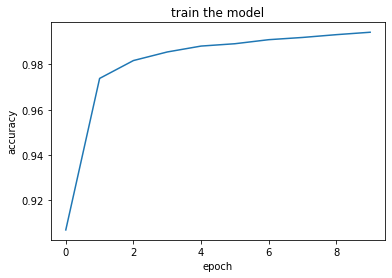

In [14]:
draw_plot(model2_log.history['accuracy'], 'train the model', 'epoch', 'accuracy')

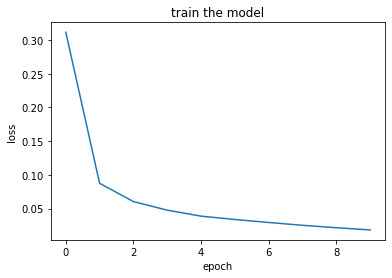

In [15]:
draw_plot(model2_log.history['loss'], 'train the model', 'epoch', 'loss')

In [16]:
score2 = model2.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9911
Test loss: 0.030258191749453545
Test accuracy: 0.991100013256073


### >>> first model selected <<<

In [17]:
predicted = model.predict(X_test, verbose=1, batch_size=1)


10000/10000 [==============================] - 9s 875us/step


In [18]:
predicted_classes = predicted.argmax(axis=-1)

In [19]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sb

def draw_confusion_matrix(y_true, y_pred):
    matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
    rows, columns = classes_amount, classes_amount
    df_cm = pd.DataFrame(matrix, range(rows), range(columns))
    plt.figure(figsize = (10,7))
    sb.heatmap(df_cm, annot=True, cmap='cool', annot_kws={"size": 15}, fmt='.4g')

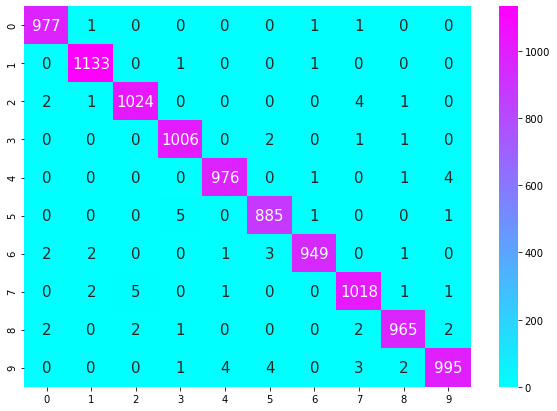

In [20]:
draw_confusion_matrix(y_test_classes, predicted_classes)

In [21]:
def get_image_matrix(y_true, predicted_data, row_images):
    """
    find best image for each cell
    """
    assert len(y_true) == len(predicted_data)
    n = len(y_true)
    
    images = [[None for _ in range(classes_amount)] for _ in range(classes_amount)]
    scores = [[0 for _ in range(classes_amount)] for _ in range(classes_amount)]

    for i in range(n):
        cur_scores = predicted_data[i]
        cur_scores_best = scores[y_true[i]]
        for j in range(classes_amount):
            if cur_scores[j] > cur_scores_best[j]:
                cur_scores_best[j] = cur_scores[j]
                images[y_true[i]][j] = row_images[i].reshape(28, 28)
    return images


def transfrom_list(list_2_dim):
    list_1_dim = []
    for l in list_2_dim:
        list_1_dim += l
    return list_1_dim

/usr/local/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


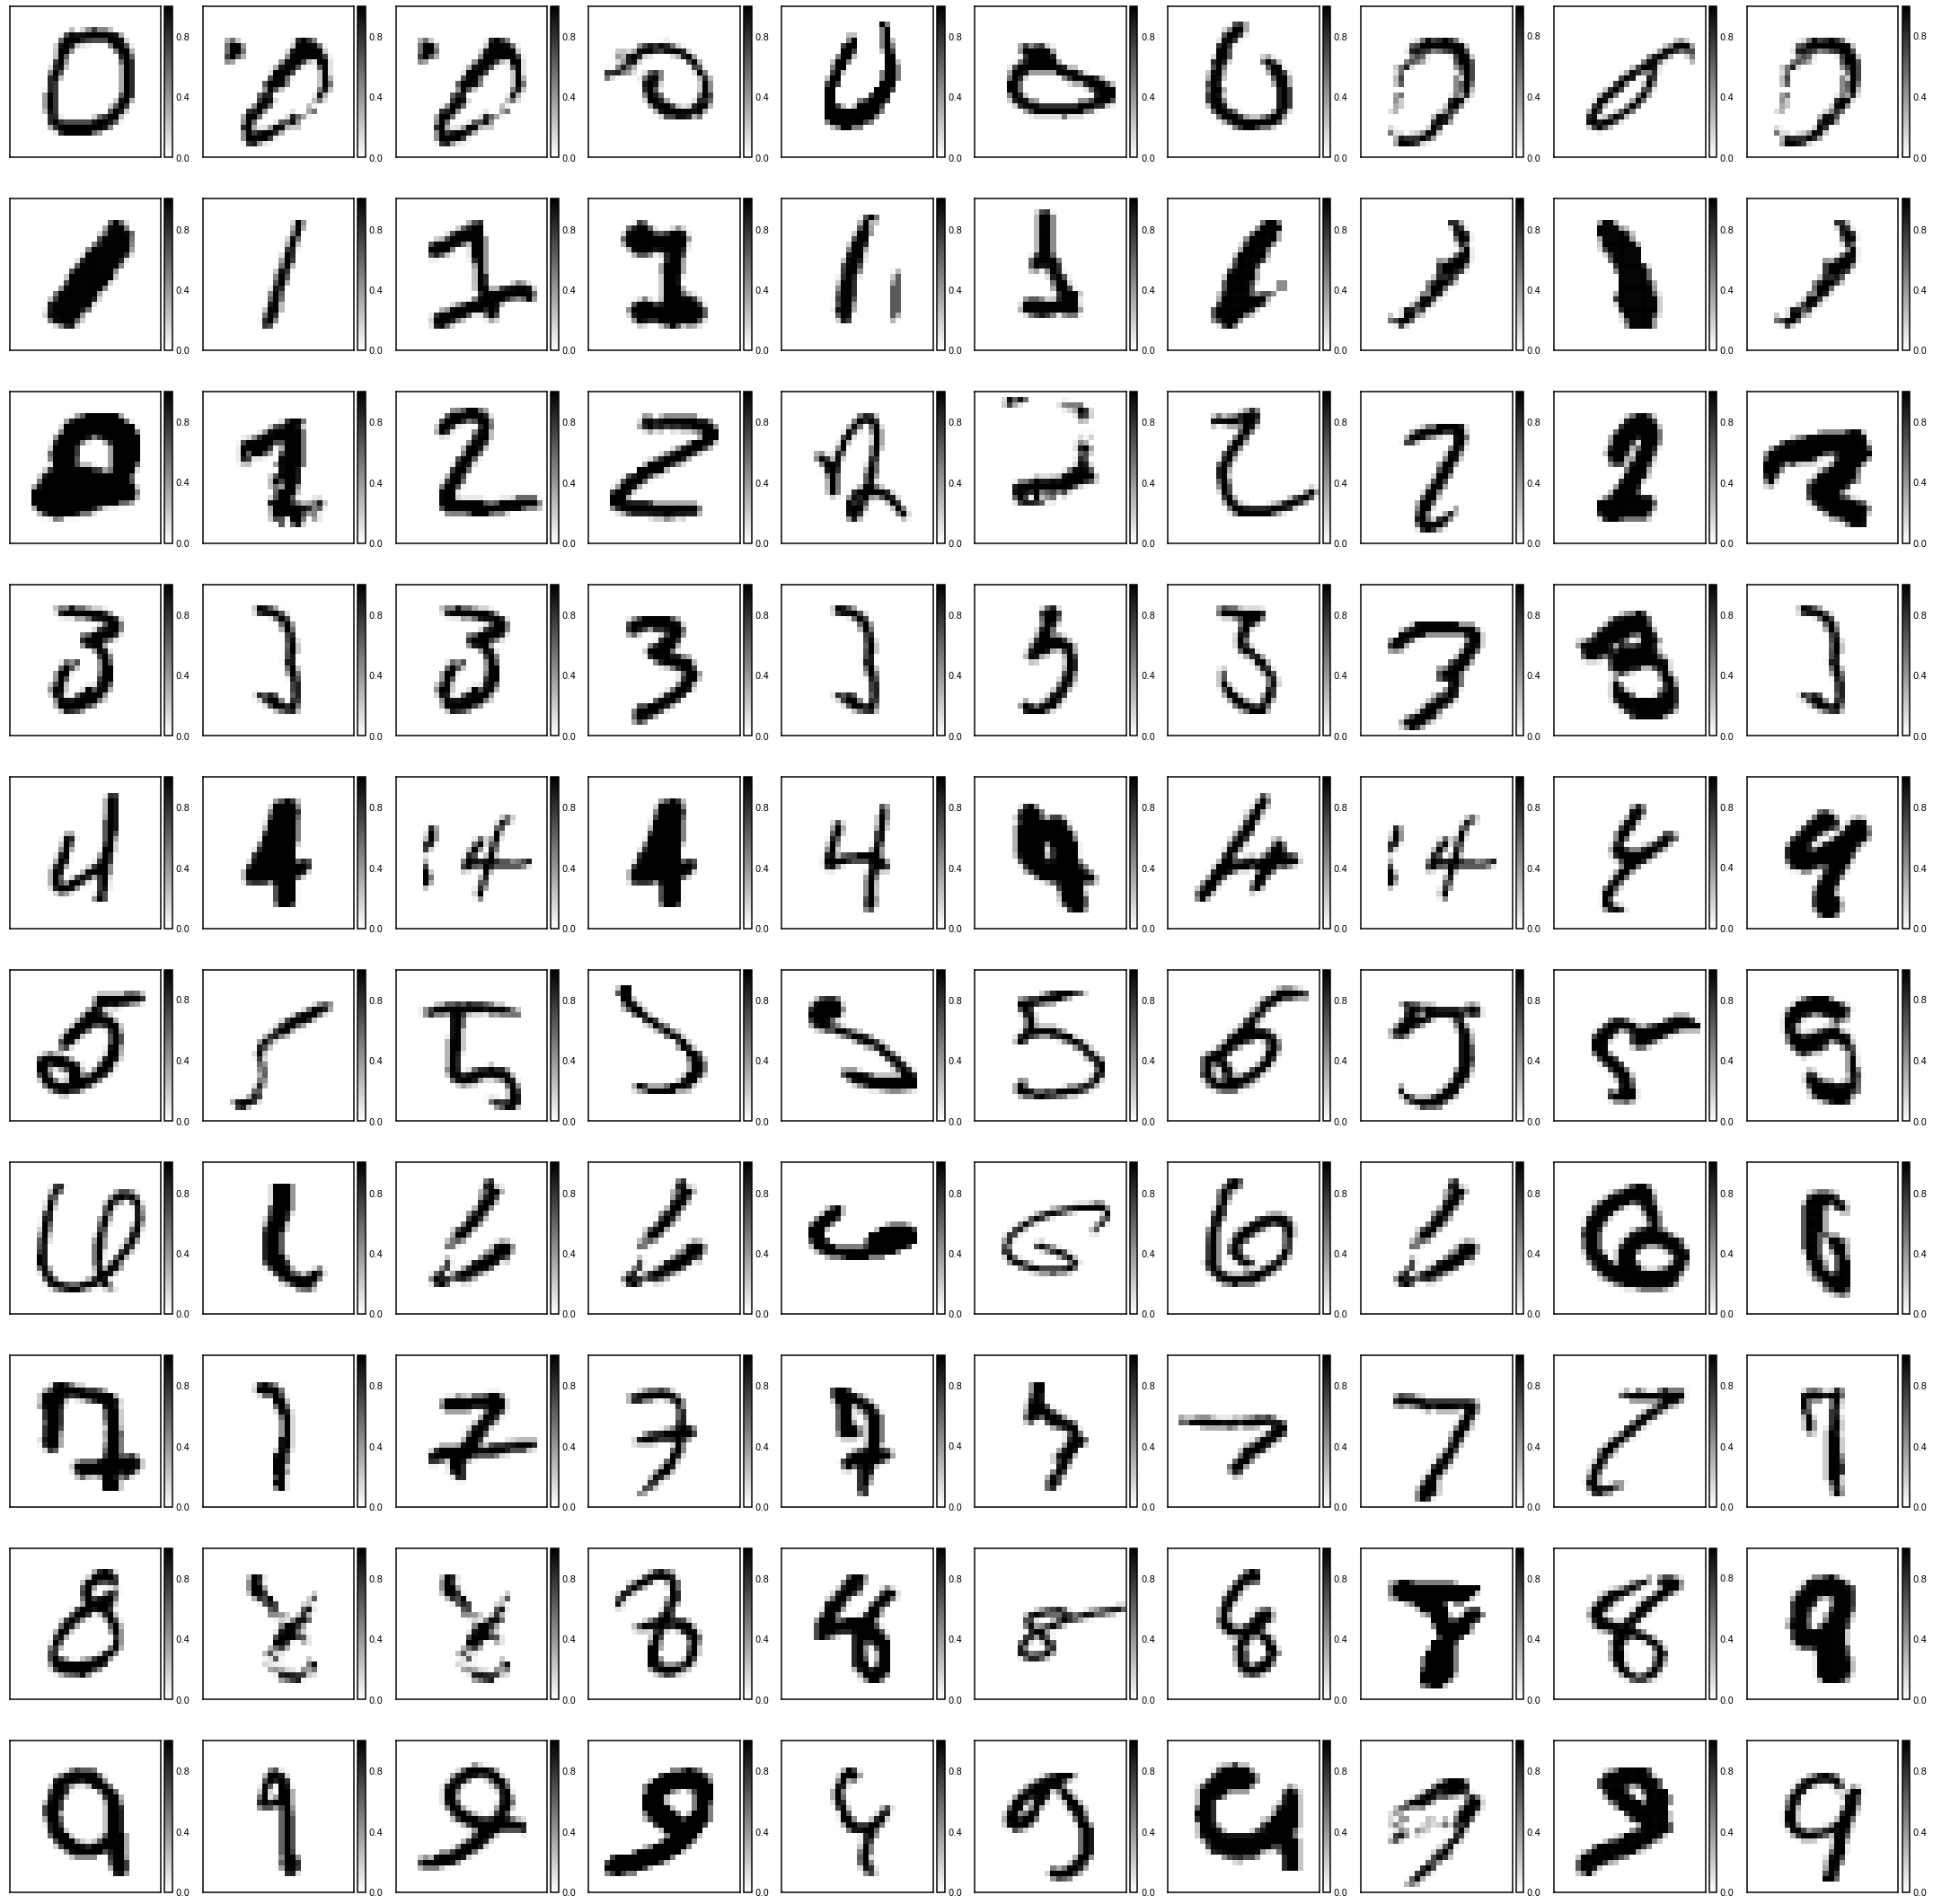

In [22]:
import seaborn_image as isb

images = get_image_matrix(y_test_classes, predicted, X_test)  
list_to_print = transfrom_list(images)
isb.ImageGrid(list_to_print, origin='upper', col_wrap=10, cmap='binary')

# Fashion MNIST

In [23]:
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion_classes) = fashion_mnist.load_data()

In [24]:
print(f"train data amount: {X_train_fashion.shape[0]}, each image has shape {X_train_fashion.shape[1]}x{X_train_fashion.shape[2]}")
print(f"test data amount: {X_test_fashion.shape[0]}, each image has shape {X_test_fashion.shape[1]}x{X_test_fashion.shape[2]}")

train data amount: 60000, each image has shape 28x28
test data amount: 10000, each image has shape 28x28


In [25]:
# reshape to (channels, conv_dim1, conv_dim2, conv_dim3)

img_rows = 28
img_cols = 28

X_train_fashion = X_train_fashion.reshape(X_train_fashion.shape[0], img_rows, img_cols, 1) / 255.0
X_test_fashion = X_test_fashion.reshape(X_test_fashion.shape[0], img_rows, img_cols, 1) / 255.0
input_shape = (img_rows, img_cols, 1)

print('X_train_fashion shape:', X_train_fashion.shape)

X_train_fashion shape: (60000, 28, 28, 1)


In [26]:
lasses_amount = 10

# convert class number to vector 
# i.e. 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

y_train_fashion = keras.utils.to_categorical(y_train_fashion, classes_amount)
y_test_fashion = keras.utils.to_categorical(y_test_fashion_classes, classes_amount)

In [27]:
batch_size = 64
epoch_amount = 20

# train the model using built-in learning and evaluation loops
model_log_fashion = model.fit(X_train_fashion, y_train_fashion,
          batch_size=batch_size,
          epochs=epoch_amount,
          verbose=1,
          validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/20
938/938 [==============================] - 55s 58ms/step - loss: 0.5164 - accuracy: 0.8220 - val_loss: 0.3255 - val_accuracy: 0.8814
Epoch 2/20
938/938 [==============================] - 55s 58ms/step - loss: 0.3497 - accuracy: 0.8744 - val_loss: 0.2875 - val_accuracy: 0.8958
Epoch 3/20
938/938 [==============================] - 55s 58ms/step - loss: 0.3053 - accuracy: 0.8890 - val_loss: 0.2661 - val_accuracy: 0.9033
Epoch 4/20
938/938 [==============================] - 55s 58ms/step - loss: 0.2742 - accuracy: 0.8991 - val_loss: 0.2618 - val_accuracy: 0.9027
Epoch 5/20
938/938 [==============================] - 55s 59ms/step - loss: 0.2560 - accuracy: 0.9055 - val_loss: 0.2445 - val_accuracy: 0.9133
Epoch 6/20
938/938 [==============================] - 55s 59ms/step - loss: 0.2402 - accuracy: 0.9111 - val_loss: 0.2553 - val_accuracy: 0.9075
Epoch 7/20
938/938 [==============================] - 56s 60ms/step - loss: 0.2244 - accuracy: 0.9152 - val_loss: 0.2391 - val_accuracy:

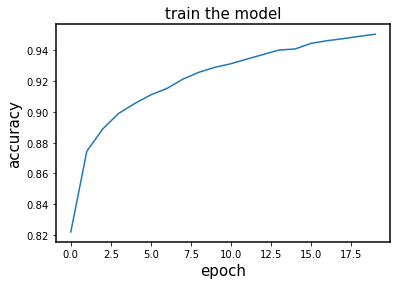

In [28]:
draw_plot(model_log_fashion.history['accuracy'], 'train the model', 'epoch', 'accuracy')

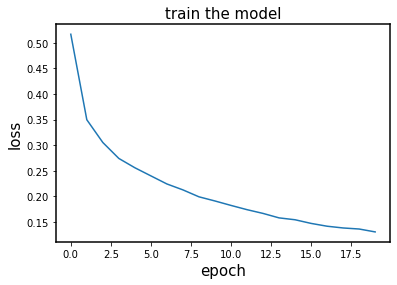

In [29]:
draw_plot(model_log_fashion.history['loss'], 'train the model', 'epoch', 'loss')

In [30]:
score = model.evaluate(X_test_fashion, y_test_fashion, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.2553 - accuracy: 0.9246
Test loss: 0.2553149163722992
Test accuracy: 0.9246000051498413


In [31]:
predicted_fashion = model.predict(X_test_fashion, verbose=1, batch_size=1)

10000/10000 [==============================] - 9s 889us/step


In [32]:
predicted_fashion_classes = predicted_fashion.argmax(axis=-1)

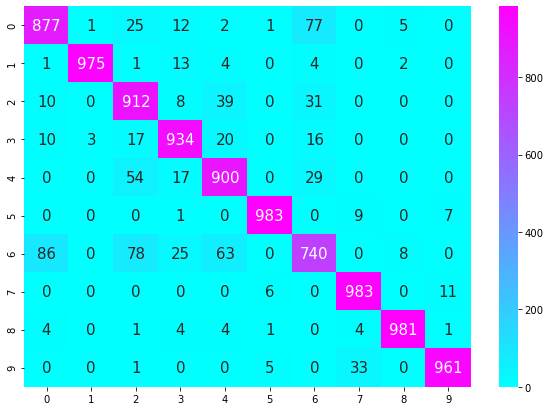

In [33]:
draw_confusion_matrix(y_test_fashion_classes, predicted_fashion_classes)

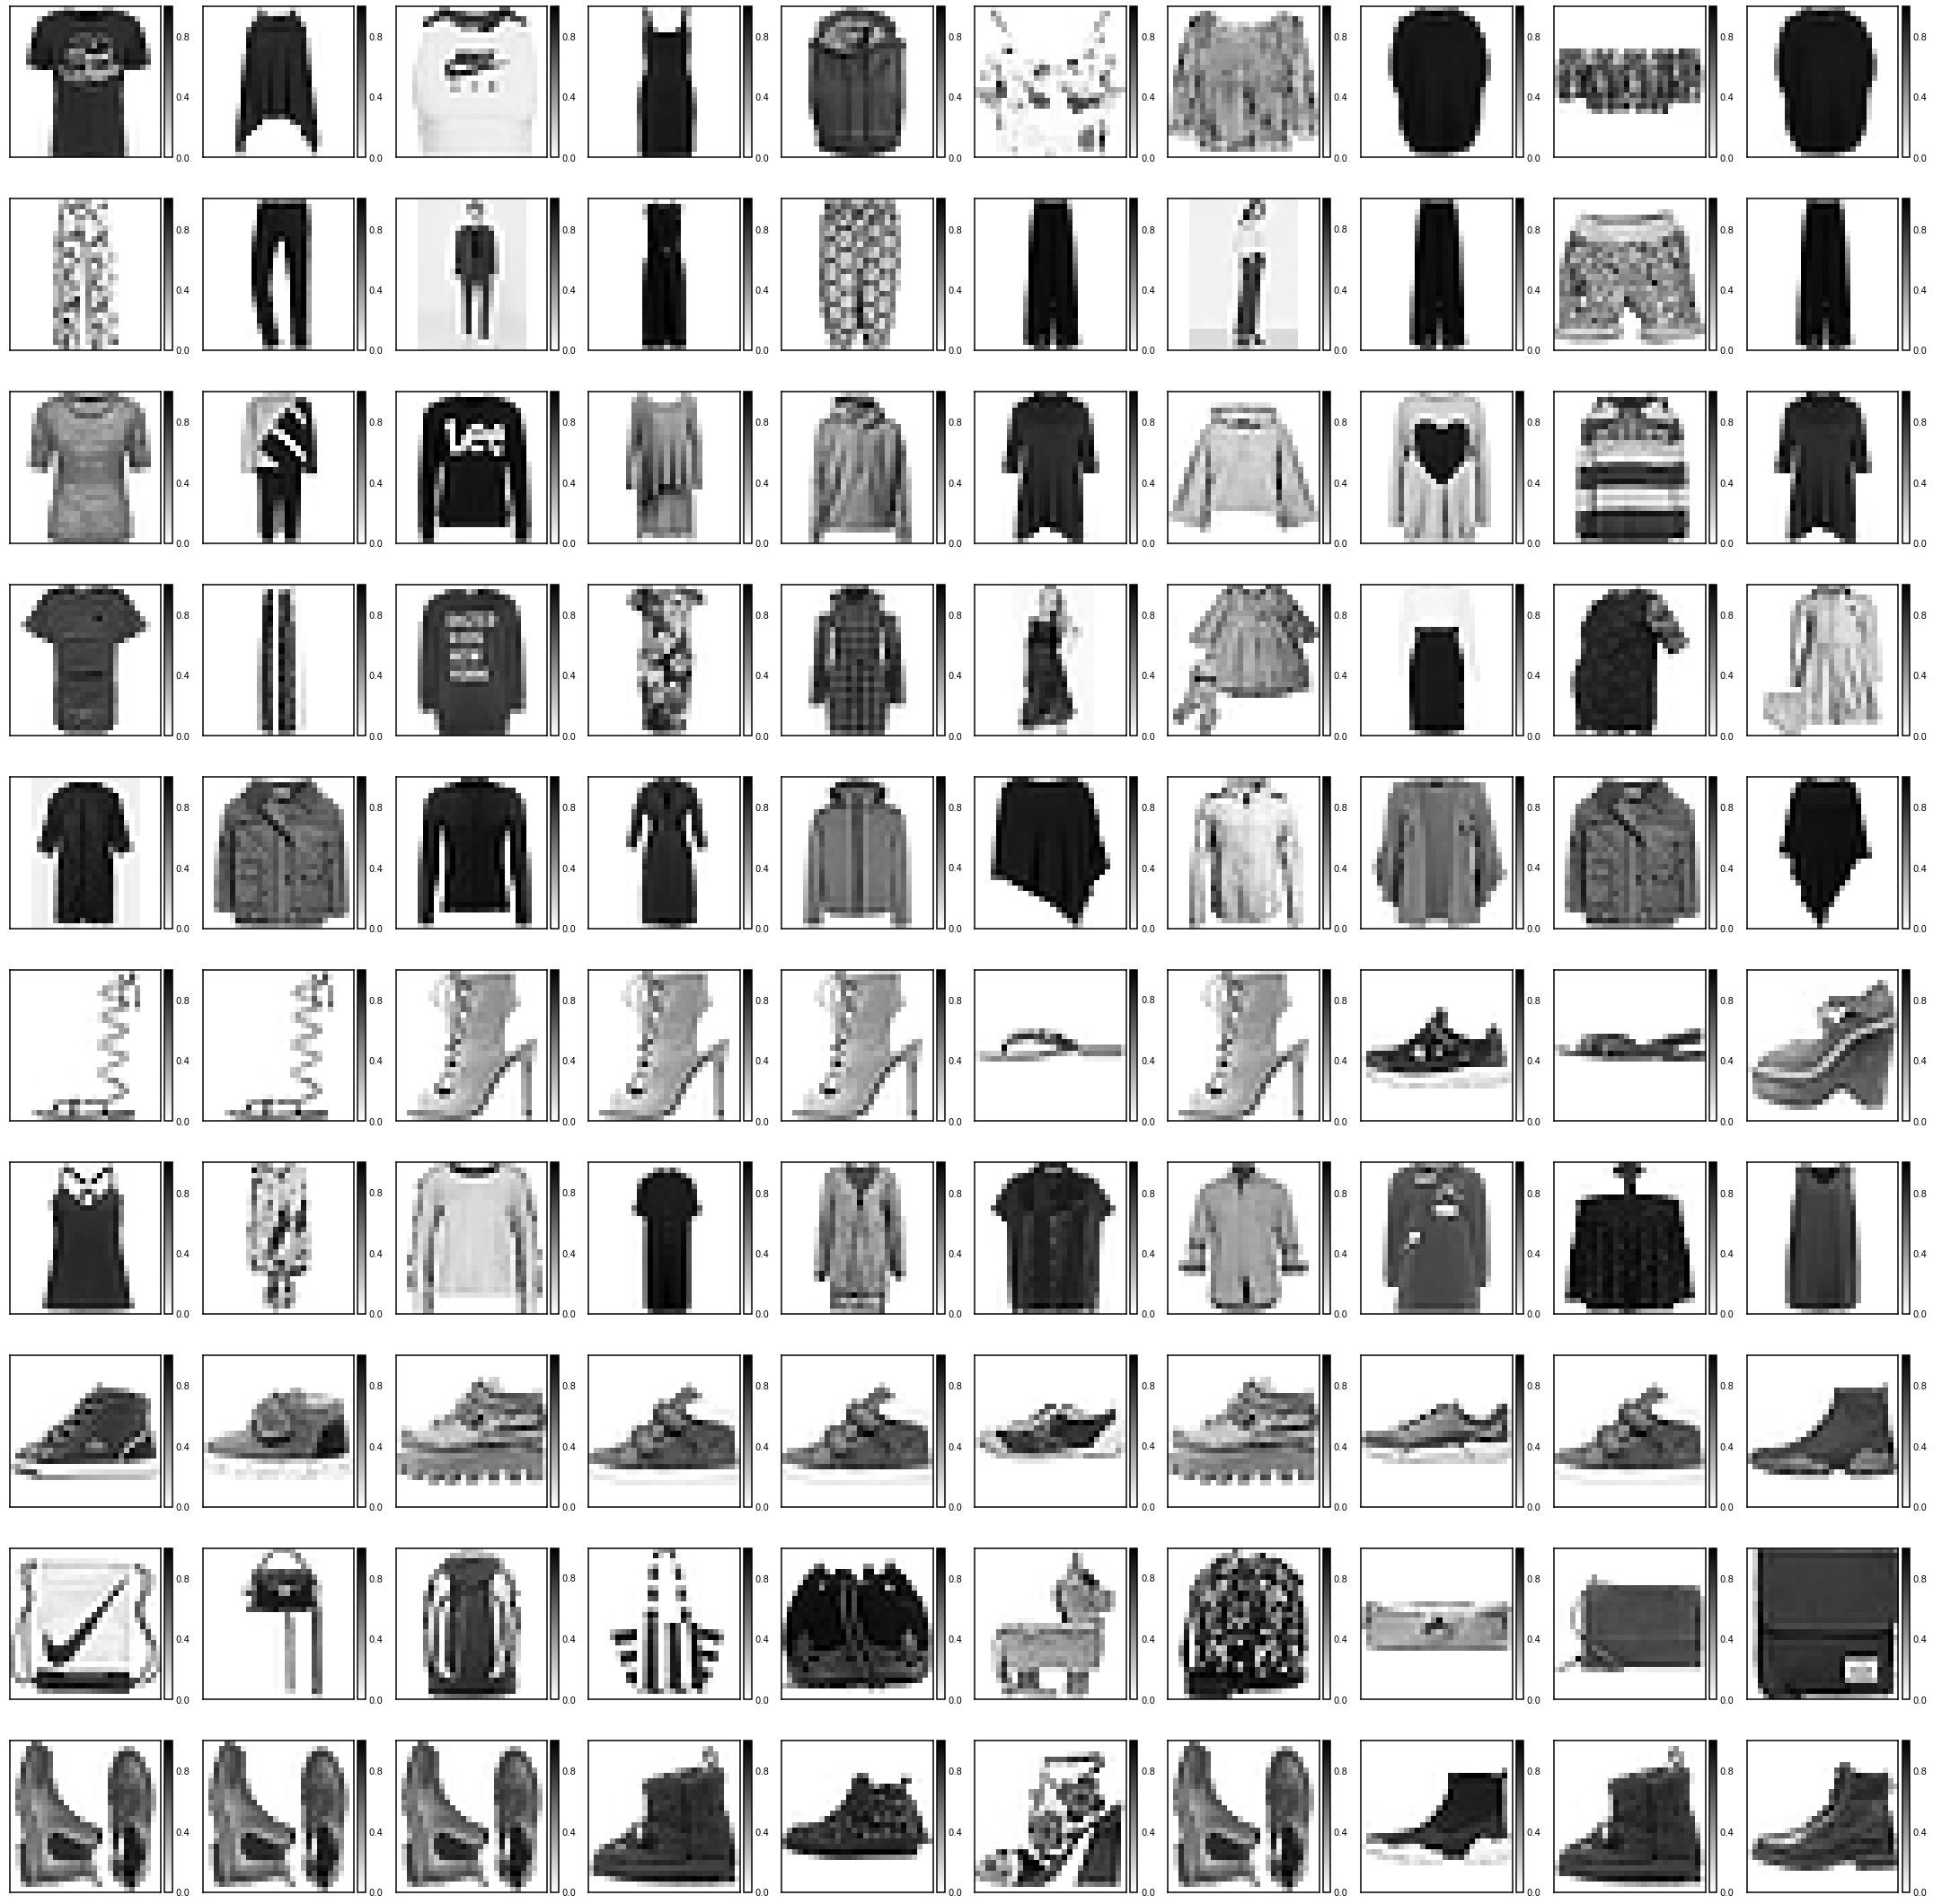

In [34]:
images = get_image_matrix(y_test_fashion_classes, predicted_fashion, X_test_fashion)  
list_to_print = transfrom_list(images)
isb.ImageGrid(list_to_print, origin='upper', col_wrap=10, cmap='binary')